In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv('https://raw.githubusercontent.com/jnhausler/ECGR4105/main/D3.csv')
df = pd.read_csv("D3.csv")
df.head() # to get first n rows from the dataset default value of n is 5
length = len(df)
print('length = ', length) # will output length of dataset

length =  100


In [3]:
x1 = df.values[:, 0] # get input values from first column
x2 = df.values[:, 1] # get input values from second column
x3 = df.values[:, 2] # get input values from third column
y = df.values[:, 3] # get output values from fourth column
m = len(y)
print('x1 = ', x1[: 5]) # show only first 5 records
print('x2 = ', x2[: 5])
print('x3 = ', x3[: 5])

x1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
x2 =  [3.44       0.13494949 0.82989899 1.52484848 2.21979798]
x3 =  [0.44       0.88848485 1.3369697  1.78545455 2.23393939]


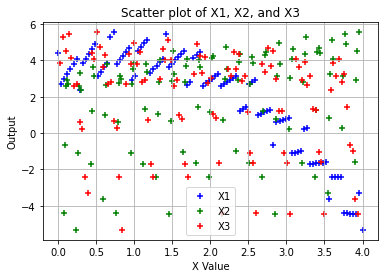

In [4]:
plt.figure(1)
plt.scatter(x1, y, color = 'blue', marker = '+', label = 'X1')
plt.scatter(x2, y, color = 'green', marker = '+', label = 'X2')
plt.scatter(x3, y, color = 'red', marker = '+', label = 'X3')
plt.grid()
plt.title('Scatter plot of X1, X2, and X3')
plt.legend()
plt.xlabel('X Value')
plt.ylabel('Output')
plt.rcParams["figure.figsize"]=(10,6)

In [5]:
## Problem 1

In [6]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [7]:
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)
X_1[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [8]:
X1 = np.hstack((X_0, X_1))
X2 = np.hstack((X_0, X_2))
X3 = np.hstack((X_0, X_3))
X1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [9]:
theta1 = np.zeros(2)
theta2 = np.zeros(2)
theta3 = np.zeros(2)
theta1

array([0., 0.])

In [10]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta) #gives h in cost function, mx1 array of (theta0 - theta1*x1)
    errors = np.subtract(predictions, y) #gives (h(x^i)-y^i)
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors)
    
    return J

In [11]:
def gradient_descent(X, y, theta, alpha, iterations): # thetaj = thetaj - alpha*(1/m sum((h(x^i)-y^i)x^i))
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) #gives h
        loss = np.subtract(predictions, y) #gives (h(x^i)-y^i)
        sum_delta = (alpha / m) * X.transpose().dot(loss); #gives sum( (alpha/m)*((h(x^i)-y^i)x^i) ) output is 1x1
        theta -= sum_delta;
        cost_history[i] = compute_cost(X, y, theta) #recursion
        
    return theta, cost_history

In [12]:
theta1=[0.,0.]
theta2 = [0., 0.]
theta3 = [0., 0.]
iterations=1500;
alpha=0.03;

theta1,cost_history1=gradient_descent(X1,y,theta1,alpha,iterations)
theta2,cost_history2=gradient_descent(X2,y,theta2,alpha,iterations)
theta3,cost_history3=gradient_descent(X3,y,theta3,alpha,iterations)

print('Final value of theta for x1 = ',theta1)
print('Cost history of x1 = ',cost_history1)

print('Final value of theta for x2 = ',theta2)
print('Cost history of x2 = ',cost_history2)

print('Final value of theta for x3 = ',theta3)
print('Cost history of x3 = ',cost_history3)


Final value of theta for x1 =  [ 5.92768519 -2.03823399]
Cost history of x1 =  [5.40240885 5.30268813 5.21806121 ... 0.98499309 0.98499309 0.98499309]
Final value of theta for x2 =  [0.73604006 0.55761554]
Cost history of x2 =  [4.88901283 4.46596512 4.18427698 ... 3.59936602 3.59936602 3.59936602]
Final value of theta for x3 =  [ 2.87131829 -0.52044183]
Cost history of x3 =  [5.19495378 4.96883046 4.81248407 ... 3.62945113 3.62945113 3.62945113]


Final linear model is: 5.927685193968737 + -2.0382339908989495 x1


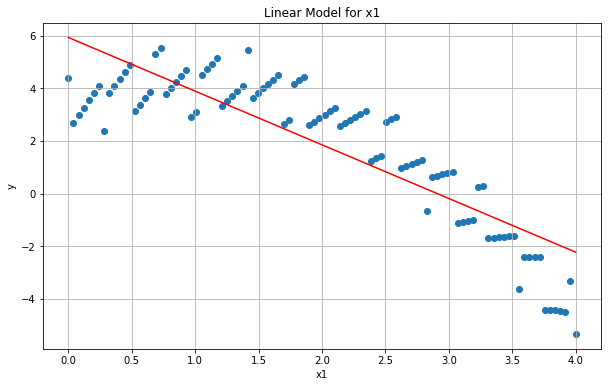

In [13]:
plt.figure(2)
plt.scatter(X1[:,1], y)
plt.plot(X1[:, 1], X1.dot(theta1), color = 'red')
plt.grid()
plt.title('Linear Model for x1')
plt.xlabel('x1')
plt.ylabel('y')
plt.rcParams["figure.figsize"]=(10,6)

print("Final linear model is:", theta1[0], "+", theta1[1], "x1" )

Final linear model is: 0.736040056986587 + 0.5576155397287266 x2


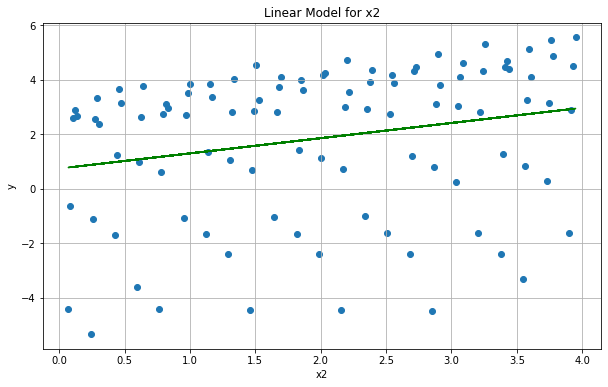

In [14]:
plt.figure(3)
plt.scatter(X2[:,1], y)
plt.plot(X2[:, 1], X2.dot(theta2), color = 'green')
plt.grid()
plt.title('Linear Model for x2')
plt.xlabel('x2')
plt.ylabel('y')
plt.rcParams["figure.figsize"]=(10,6)

print("Final linear model is:", theta2[0], "+", theta2[1], "x2" )

Final linear model is: 2.8713182948952123 + -0.5204418283690866 x3


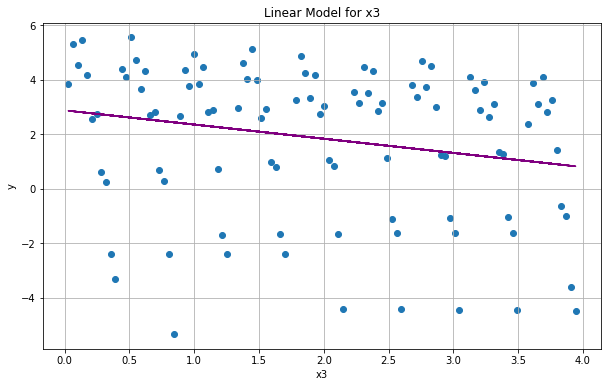

In [15]:
plt.figure(4)
plt.scatter(X3[:,1], y)
plt.plot(X3[:, 1], X3.dot(theta3), color = 'purple')
plt.grid()
plt.title('Linear Model for x3')
plt.xlabel('x3')
plt.ylabel('y')
plt.rcParams["figure.figsize"]=(10,6)

print("Final linear model is:", theta3[0], "+", theta3[1], "x3" )

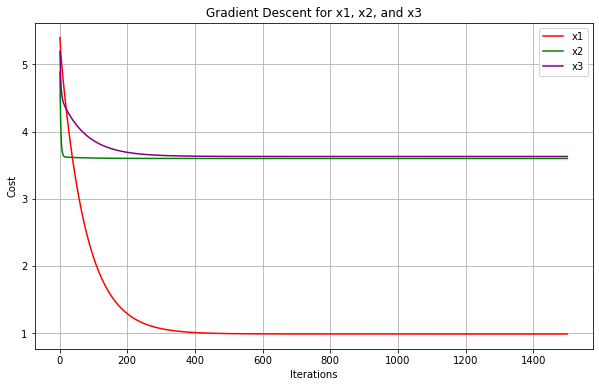

In [16]:
plt.figure(4)
plt.plot(range(1, iterations + 1), cost_history1, color = 'red', label = 'x1')
plt.plot(range(1, iterations + 1), cost_history2, color = 'green', label = 'x2')
plt.plot(range(1, iterations + 1), cost_history3, color = 'purple', label = 'x3')
plt.grid()
plt.legend()
plt.title('Gradient Descent for x1, x2, and x3')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.rcParams["figure.figsize"]=(10,6)


In [17]:
# Problem 1, part 3 - x3 has the lower cost for the output y as seen in the
# graph above.

# Problem 1, part 4 - A higher learning rate will make the function reach the
# lowest cost in the earlier iterations. (faster)

In [18]:
## Problem 2

In [19]:
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [20]:
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)
X_1[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [21]:
X = np.hstack((X_0, X_1, X_2, X_3))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.13494949, 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545455],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [22]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [23]:
theta= [0., 0., 0., 0.]
iterations2=1500;
alpha2=0.03;

theta,cost_history=gradient_descent(X,y,theta,alpha2,iterations2)
print('Final value of theta =',theta)
print('cost_history =',cost_history)

Final value of theta = [ 5.25606097 -1.99551081  0.54216503 -0.25708468]
cost_history = [4.71048139 4.32282567 4.08518061 ... 0.73864626 0.73864517 0.73864409]


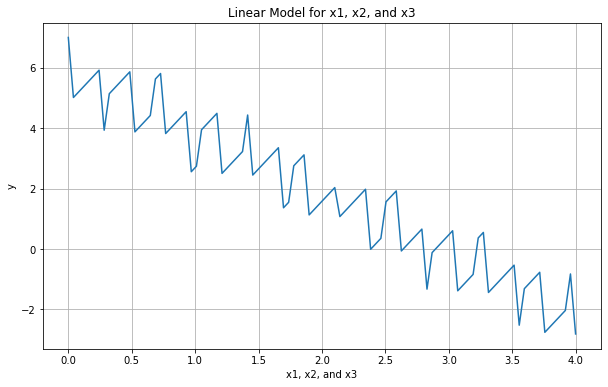

In [24]:
plt.figure(5)
plt.plot(X[:, 1], X.dot(theta))
plt.grid()
plt.title('Linear Model for x1, x2, and x3')
plt.xlabel('x1, x2, and x3')
plt.ylabel('y')
plt.rcParams["figure.figsize"]=(10,6)

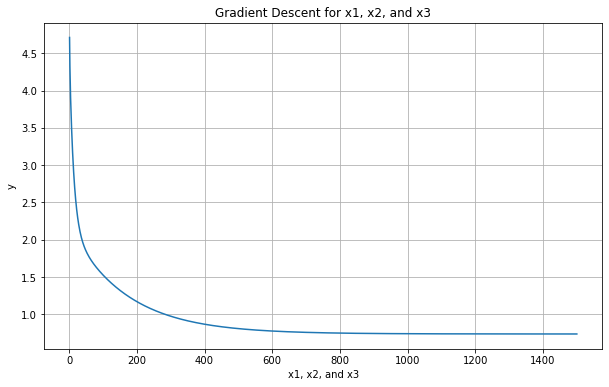

In [25]:
plt.figure(6)
plt.plot(range(1, iterations2 + 1), cost_history)
plt.grid()
plt.title('Gradient Descent for x1, x2, and x3')
plt.xlabel('x1, x2, and x3')
plt.ylabel('y')
plt.rcParams["figure.figsize"]=(10,6)

In [26]:
# Problem 2, part 3 - Increasing the learning rate causes the final loss to
# to get to it's lowest value at an earlier iteration

In [27]:
#Predict values of y
xpoints1 = np.array([1, 1, 1, 1])
xpoints2 = np.array([1, 2, 0, 4])
xpoints3 = np.array([1, 3, 2, 1])
y1 = xpoints1.dot(theta)
y2 = xpoints2.dot(theta)
y3 = xpoints3.dot(theta)
print("New value for y if (x1, x2, x3) = (1, 1, 1) =", y1)
print("New value for y if (x1, x2, x3) = (2, 0, 4) =", y2)
print("New value for y if (x1, x2, x3) = (3, 2, 1) =", y3)

New value for y if (x1, x2, x3) = (1, 1, 1) = 3.54563051550464
New value for y if (x1, x2, x3) = (2, 0, 4) = 0.23670064966968307
New value for y if (x1, x2, x3) = (3, 2, 1) = 0.09677392767093917
